#1. Setup and Load Data

In [ ]:
!pip install tensorflow opencv-python matplotlib

To Check all the requirment installed correctly.

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.5
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.1
arviz                            0.15.1
astropy                          5.3.3
astunparse                       1.6.3
async-timeout                    4.0.3
attrs                            23.1.0
audioread                        3.0.0
autograd                         1.6.2
Babel                            2.12.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.0.0
blinker                          1.4
bl

In [ ]:
import tensorflow as tf
import os, shutil

Accessing the Data from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load Data to Workable Directory for Colab

In [ ]:
! unzip /content/drive/MyDrive/ColabData/lung_cancer_dataset.zip

Archive:  /content/drive/MyDrive/ColabData/lung_cancer_dataset.zip
   creating: lung_cancer_dataset/
   creating: lung_cancer_dataset/nagative/
  inflating: lung_cancer_dataset/nagative/person100_bacteria_475.jpeg  
  inflating: lung_cancer_dataset/nagative/person100_bacteria_477.jpeg  
  inflating: lung_cancer_dataset/nagative/person100_bacteria_478.jpeg  
  inflating: lung_cancer_dataset/nagative/person100_bacteria_479.jpeg  
  inflating: lung_cancer_dataset/nagative/person100_bacteria_480.jpeg  
  inflating: lung_cancer_dataset/nagative/person100_bacteria_481.jpeg  
  inflating: lung_cancer_dataset/nagative/person100_bacteria_482.jpeg  
  inflating: lung_cancer_dataset/nagative/person101_bacteria_483.jpeg  
  inflating: lung_cancer_dataset/nagative/person101_bacteria_484.jpeg  
  inflating: lung_cancer_dataset/nagative/person101_bacteria_485.jpeg  
  inflating: lung_cancer_dataset/nagative/person101_bacteria_486.jpeg  
  inflating: lung_cancer_dataset/nagative/person102_bacteria_487

In [ ]:
data_dir = '/content/lung_cancer_dataset'

In [ ]:
os.listdir(data_dir)

['nagative', 'positive']

In [ ]:
os.listdir(os.path.join (data_dir, 'nagative'))

['person1650_virus_2854.jpeg',
 'person100_bacteria_482.jpeg',
 'person85_bacteria_421.jpeg',
 'person108_bacteria_507.jpeg',
 'person159_bacteria_746.jpeg',
 'person59_virus_116.jpeg',
 'person76_virus_138.jpeg',
 'person141_bacteria_670.jpeg',
 'person44_virus_94.jpeg',
 'person1667_virus_2881.jpeg',
 'person33_virus_72.jpeg',
 'person81_bacteria_398.jpeg',
 'person70_virus_130.jpeg',
 'person152_bacteria_723.jpeg',
 'person49_virus_101.jpeg',
 'person1612_virus_2798.jpeg',
 'person37_virus_82.jpeg',
 'person61_virus_118.jpeg',
 'person3_virus_17.jpeg',
 'person103_bacteria_490.jpeg',
 'person139_bacteria_664.jpeg',
 'person53_virus_107.jpeg',
 'person60_virus_117.jpeg',
 'person100_bacteria_477.jpeg',
 'person147_bacteria_706.jpeg',
 'person15_virus_46.jpeg',
 'person161_bacteria_759.jpeg',
 'person1610_virus_2793.jpeg',
 'person1631_virus_2826.jpeg',
 'person92_bacteria_450.jpeg',
 'person14_virus_44.jpeg',
 'person140_bacteria_668.jpeg',
 'person142_bacteria_682.jpeg',
 'person72_

In [ ]:
os.listdir(os.path.join (data_dir, 'positive'))

['NORMAL2-IM-0123-0001.jpeg',
 'NORMAL2-IM-0351-0001.jpeg',
 'NORMAL2-IM-0135-0001.jpeg',
 'IM-0089-0001.jpeg',
 'NORMAL2-IM-0310-0001.jpeg',
 'IM-0093-0001.jpeg',
 'IM-0017-0001.jpeg',
 'NORMAL2-IM-0337-0001.jpeg',
 'NORMAL2-IM-0195-0001.jpeg',
 'NORMAL2-IM-0354-0001.jpeg',
 'NORMAL2-IM-0349-0001.jpeg',
 'NORMAL2-IM-0079-0001.jpeg',
 'IM-0015-0001.jpeg',
 'NORMAL2-IM-0348-0001.jpeg',
 'IM-0095-0001.jpeg',
 'NORMAL2-IM-0052-0001.jpeg',
 'NORMAL2-IM-0368-0001.jpeg',
 'IM-0059-0001.jpeg',
 'NORMAL2-IM-0285-0001.jpeg',
 'NORMAL2-IM-0345-0001.jpeg',
 'NORMAL2-IM-0019-0001.jpeg',
 'NORMAL2-IM-0309-0001.jpeg',
 'NORMAL2-IM-0201-0001.jpeg',
 'IM-0075-0001.jpeg',
 'NORMAL2-IM-0374-0001-0002.jpeg',
 'NORMAL2-IM-0027-0001.jpeg',
 'NORMAL2-IM-0096-0001.jpeg',
 'IM-0085-0001.jpeg',
 'NORMAL2-IM-0058-0001.jpeg',
 'IM-0083-0001.jpeg',
 'NORMAL2-IM-0319-0001.jpeg',
 'NORMAL2-IM-0336-0001.jpeg',
 'IM-0073-0001.jpeg',
 'NORMAL2-IM-0033-0001.jpeg',
 'IM-0011-0001.jpeg',
 'NORMAL2-IM-0130-0001.jpeg',
 'N

#2. Remove dodgy images

In [ ]:
import cv2
import imghdr

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

#3. Load Data

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/lung_cancer_dataset')

Found 534 files belonging to 2 classes.


In [ ]:
len(data)

17

In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
len(batch)

2

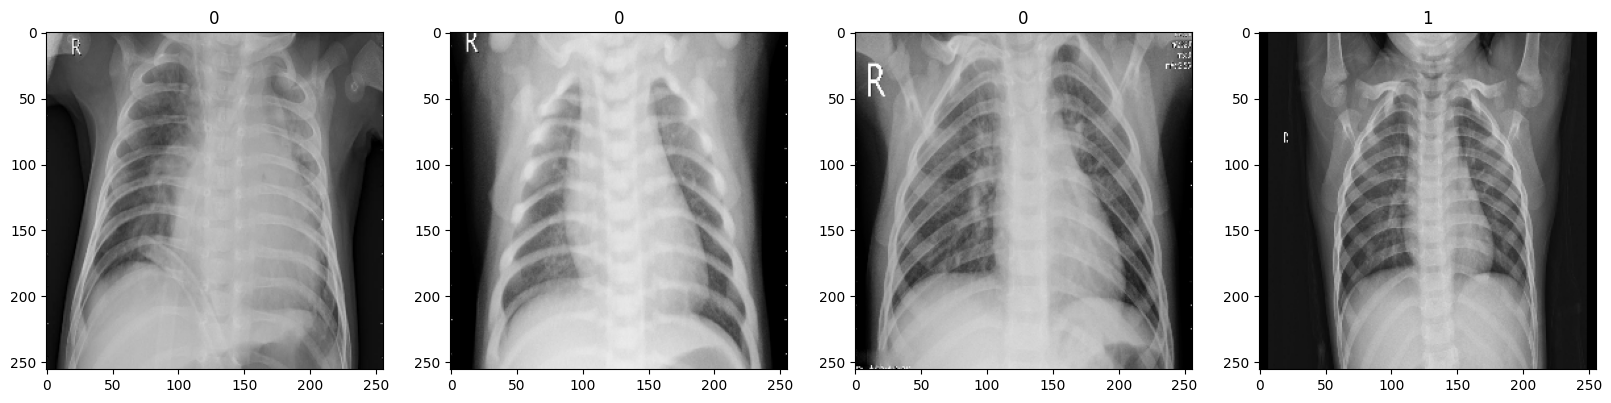

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

#4. Scale Data

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.12237477, 0.12237477, 0.12237477],
          [0.1338848 , 0.1338848 , 0.1338848 ],
          [0.1598786 , 0.1598786 , 0.1598786 ],
          ...,
          [0.20773494, 0.20773494, 0.20773494],
          [0.06279489, 0.06279489, 0.06279489],
          [0.11988645, 0.11988645, 0.11988645]],
 
         [[0.12935048, 0.12935048, 0.12935048],
          [0.14333928, 0.14333928, 0.14333928],
          [0.1518593 , 0.1518593 , 0.1518593 ],
          ...,
          [0.11059666, 0.11059666, 0.11059666],
          [0.10755017, 0.10755017, 0.10755017],
          [0.12442938, 0.12442938, 0.12442938]],
 
         [[0.13443628, 0.13443628, 0.13443628],
          [0.15318628, 0.15318628, 0.15318628],
          [0.14639054, 0.14639054, 0.14639054],
          ...,
          [0.14515357, 0.14515357, 0.14515357],
          [0.07807808, 0.07807808, 0.07807808],
          [0.08171147, 0.08171147, 0.08171147]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [ ]:
len(data)

17

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [ ]:
print (train_size, val_size, test_size, train_size+val_size+test_size)

11 4 2 17


In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
11/11 [==============================] - 36s 3s/step - loss: 0.8888 - accuracy: 0.5256 - val_loss: 0.6828 - val_accuracy: 0.8438
Epoch 2/20
11/11 [==============================] - 29s 2s/step - loss: 0.6657 - accuracy: 0.6165 - val_loss: 0.6930 - val_accuracy: 0.4141
Epoch 3/20
11/11 [==============================] - 31s 3s/step - loss: 0.5477 - accuracy: 0.7784 - val_loss: 0.4504 - val_accuracy: 0.8359
Epoch 4/20
11/11 [==============================] - 29s 2s/step - loss: 0.3677 - accuracy: 0.8523 - val_loss: 0.3711 - val_accuracy: 0.8516
Epoch 5/20
11/11 [==============================] - 33s 3s/step - loss: 0.3305 - accuracy: 0.8580 - val_loss: 0.2953 - val_accuracy: 0.8359
Epoch 6/20
11/11 [==============================] - 29s 2s/step - loss: 0.2186 - accuracy: 0.9176 - val_loss: 0.2119 - val_accuracy: 0.9297
Epoch 7/20
11/11 [==============================] - 29s 2s/step - loss: 0.1992 - accuracy: 0.9176 - val_loss: 0.1255 - val_accuracy: 0.9609
Epoch 8/20
11/11 [==

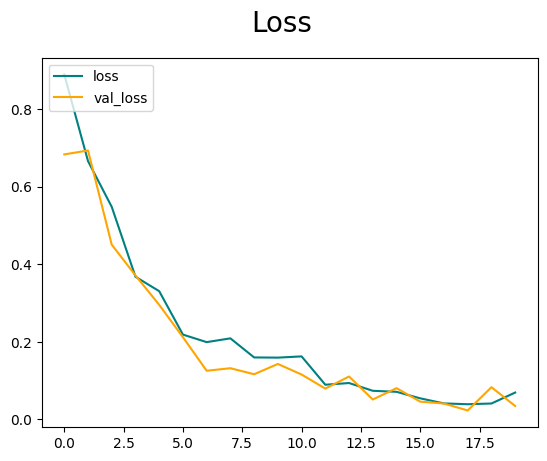

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

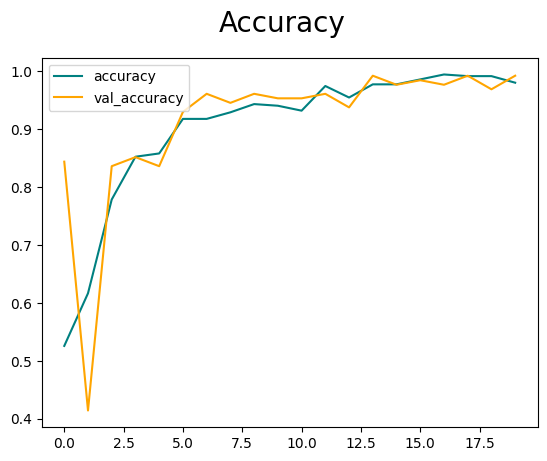

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 402ms/step


In [ ]:
print({pre.result().numpy()} ,{re.result().numpy()},{acc.result().numpy()})

{0.9166667} {1.0} {0.962963}


In [ ]:
import cv2

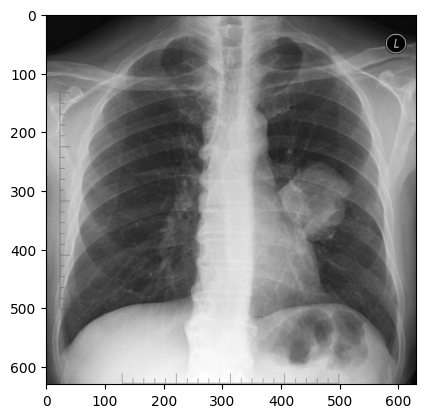

In [ ]:
img = cv2.imread('/content/9aa9ac57c144b3bcab7d6d41057e79_big_gallery.jpg')
plt.imshow(img)
plt.show()

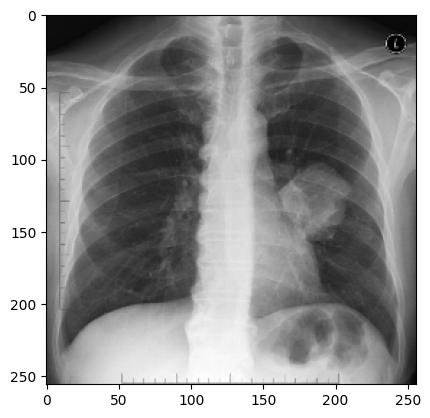

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 39ms/step


In [ ]:
yhat

array([[0.06868995]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is Positive of Lung Cancer')
else:
    print(f'Predicted class is Negetive of Lung Cancer')

Predicted class is Negetive of Lung Cancer
